In [1]:
# anomaly detection using naive bayes

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [14]:
# anomaly detection using naive bayes algorithm
# steps
# 1. load the dataset
# 2. split the dataset into training and testing sets
# 3. train the model
# 4. predict the output
# 5. calculate the accuracy of the model

In [15]:
# lets create a simple sample dataset
data = {"x": [1, 2, 3, 30, 5], "y": [2, 3, 4, 212, 6], "anomaly": [0, 0, 0, 1, 0]}

df = pd.DataFrame(data)
print(df)

    x    y  anomaly
0   1    2        0
1   2    3        0
2   3    4        0
3  30  212        1
4   5    6        0


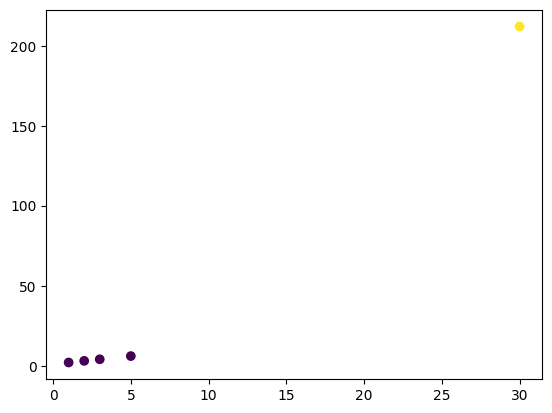

In [16]:
# lets plot the data
plt.scatter(df["x"], df["y"], c=df["anomaly"])

In [20]:
# lets add more anomalies
data = {
    "x": [1, 2, 3, 30, 5, 100, 200, 300],
    "y": [2, 3, 4, 212, 6, 100, 200, 300],
    "anomaly": [0, 0, 0, 1, 0, 1, 1, 1],
}
df = pd.DataFrame(data)

In [21]:
# lets split the dataset into training and testing sets
X = df[["x", "y"]]
y = df["anomaly"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# lets train the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [23]:
# lets predict the output
y_pred = model.predict(X_test)

In [25]:
# lets calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# other classification metrics
# 1. confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", conf_matrix)
# 2. classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)

print("Classification Report: ", class_report)

Accuracy:  1.0
Confusion Matrix:  [[1 0]
 [0 1]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



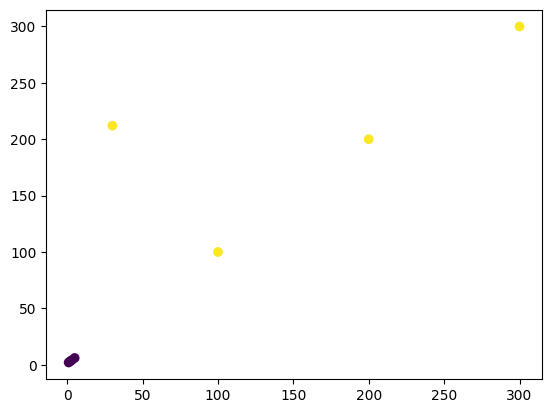

In [27]:
# lets plot our data
plt.scatter(df["x"], df["y"], c=df["anomaly"])

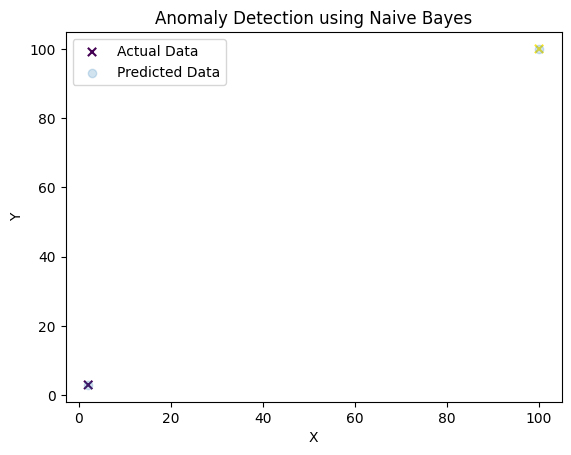

In [41]:
# lets plot the y pred
plt.scatter(X_test["x"], X_test["y"], c=y_pred, marker="x")
# lets plot actual data but with different markers
plt.scatter(X_test["x"], X_test["y"], marker="o", alpha=0.2)

# legend
plt.legend(["Actual Data", "Predicted Data", "Actual Data"], loc="best")
plt.title("Anomaly Detection using Naive Bayes")
plt.xlabel("X")
plt.ylabel("Y")


plt.show()

In [31]:
X_test["x"], X_test["y"], y_pred

(1      2
 5    100
 Name: x, dtype: int64,
 1      3
 5    100
 Name: y, dtype: int64,
 array([0, 1], dtype=int64))

In [32]:
# so as is visible here, the anomalies are correctly predicted by the model